# Preprocessing

In [2]:
!pip install seaborn

     |████████████████████████████████| 292 kB 1.3 MB/s            
     |████████████████████████████████| 11.5 MB 2.3 MB/s            
     |████████████████████████████████| 25.9 MB 205 kB/s            
     |████████████████████████████████| 3.1 MB 3.0 MB/s            
     |████████████████████████████████| 1.1 MB 6.1 MB/s            


In [3]:
import pandas as pd
import seaborn as sns

Clean up data. Classify samples into supergroups.

In [4]:
data_dir = "../data/"

path = data_dir + "tissue_filtered_neuroplastoma.csv"

df = pd.read_csv(path, dtype={"disease": str})
df = df.fillna(value={"disease": "control"})
df = df.iloc[:, 2:]
df = df[df.source != "hOB"]
df = df[(df.tissue != "Cells - EBV-transformed lymphocytes")
        & (df.tissue != "Cells - Cultured fibroblasts")]
df["group"] = df["disease"]
df.loc[df.tissue.str.startswith("Brain"), "group"] = "brain"
df.loc[df.tissue.str.startswith("Nerve -"), "group"] = "nerve"
df["disease"] = df["disease"] != "control"
df = df.sort_values("tissue").reset_index(drop=True)
display(df.head())
df.to_csv(data_dir + "data_scaled.csv", index=False)

,disease,tissue,source,MFI2,RTN4R,TDGF1,RAET1L,RTN4RL1,PRNP,TECTA,...,SLC17A1,OTOP3,PERP,TMEM106A,TMEM184A,ATP6V0A2,ZFYVE27,TMEM114,XKRX,group
0,False,Adipose - Subcutaneous,GTEX,0.726831,0.053806,0.000000,0.000000,0.735128,3.447519,0.111031,...,0.000000,0.0,4.979771,0.108357,0.121015,1.180148,1.658640,0.0,0.000000,control
1,False,Adipose - Subcutaneous,GTEX,0.360520,0.042644,0.226509,0.000000,2.100230,2.847997,0.097611,...,0.007196,0.0,2.690603,0.495695,0.077243,0.895303,1.096647,0.0,0.000000,control
2,False,Adipose - Subcutaneous,GTEX,0.830526,0.189034,0.042644,0.000000,2.204767,3.053111,0.102994,...,0.000000,0.0,4.479331,0.570463,0.097611,0.985500,1.033276,0.0,0.056584,control
3,False,Adipose - Subcutaneous,GTEX,0.239852,0.102098,0.000000,0.000000,0.825946,2.632035,0.084064,...,0.000000,0.0,3.939697,0.432959,0.090101,1.070389,1.312624,0.0,0.008221,control
4,False,Adipose - Subcutaneous,GTEX,0.505891,0.111031,0.014355,0.014355,1.134979,3.154210,0.092382,...,0.007196,0.0,3.748059,0.443607,0.037968,0.879706,1.221568,0.0,0.009198,control


Data is scaled as the following: `log_2(data + 1)`. Bring it to its original scale.

In [5]:
df.iloc[:, 3:-1] = 2 ** df.iloc[:, 3:-1] - 1
display(df.head())
df.to_csv(data_dir + "data_unscaled.csv", index=False)

,disease,tissue,source,MFI2,RTN4R,TDGF1,RAET1L,RTN4RL1,PRNP,TECTA,...,SLC17A1,OTOP3,PERP,TMEM106A,TMEM184A,ATP6V0A2,ZFYVE27,TMEM114,XKRX,group
0,False,Adipose - Subcutaneous,GTEX,0.655000,0.038000,0.00,0.00,0.664545,9.909545,0.080000,...,0.000,0.0,30.554437,0.078,0.087500,1.266,2.157188,0.0,0.000000,control
1,False,Adipose - Subcutaneous,GTEX,0.283889,0.030000,0.17,0.00,3.287778,6.200000,0.070000,...,0.005,0.0,5.455833,0.410,0.055000,0.860,1.138571,0.0,0.000000,control
2,False,Adipose - Subcutaneous,GTEX,0.778333,0.140000,0.03,0.00,3.610001,7.299998,0.074000,...,0.000,0.0,21.305553,0.485,0.070000,0.980,1.046666,0.0,0.040000,control
3,False,Adipose - Subcutaneous,GTEX,0.180871,0.073333,0.00,0.00,0.772697,5.199000,0.060000,...,0.000,0.0,14.345000,0.350,0.064444,1.100,1.483929,0.0,0.005714,control
4,False,Adipose - Subcutaneous,GTEX,0.420000,0.080000,0.01,0.01,1.196154,7.902500,0.066129,...,0.005,0.0,12.436250,0.360,0.026667,0.840,1.332000,0.0,0.006396,control


# Exploration

In [6]:
sns.set_style("ticks")

FileNotFoundError: [Errno 2] No such file or directory: '../misc/countplot.svg'

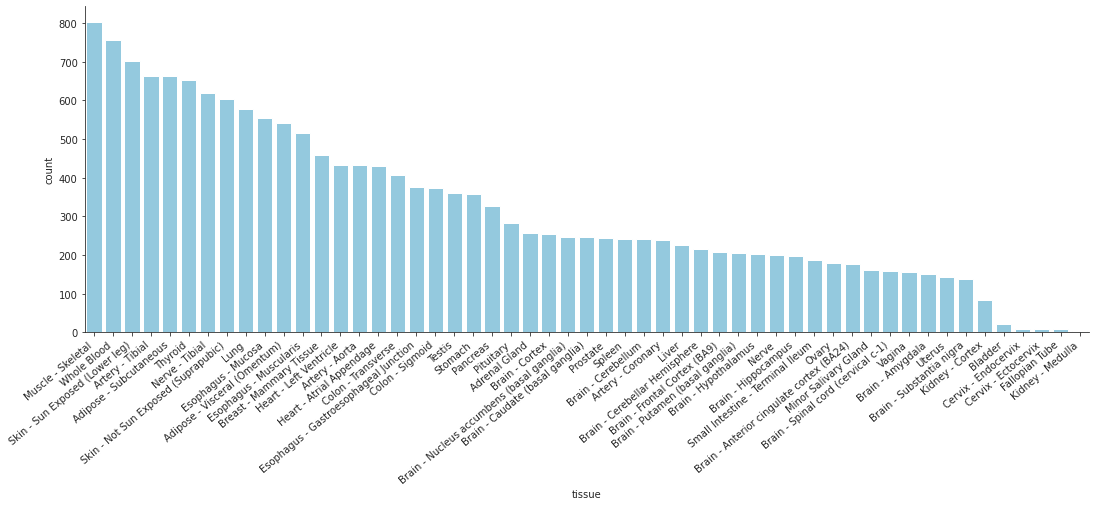

In [9]:
plot = sns.countplot(
    data=df,
    x="tissue",
    order=df.tissue.value_counts().index,
    color="skyblue"
)
#_ = plot.get_figure().bar_label(plot.containers[0])
_ = plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")
plot.get_figure().set_size_inches(18, 6)
sns.despine()

plot.get_figure().savefig("../misc/countplot.svg", format="svg", bbox_inches="tight")

In [ ]:
plot = sns.displot(df, x='tissue', hue='group', multiple='stack', aspect=3)
_ = plot.set_xticklabels(rotation=40, ha="right")
sns.despine()
plot.savefig("../misc/countplot2.svg", format="svg", bbox_inches="tight")